In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))


In [9]:
df = pd.read_csv('/content/IRIS.csv')

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df = df.iloc[:,1:]

In [12]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()

In [17]:
df['species'] = encoder.fit_transform(df['species'])

In [18]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [19]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [20]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

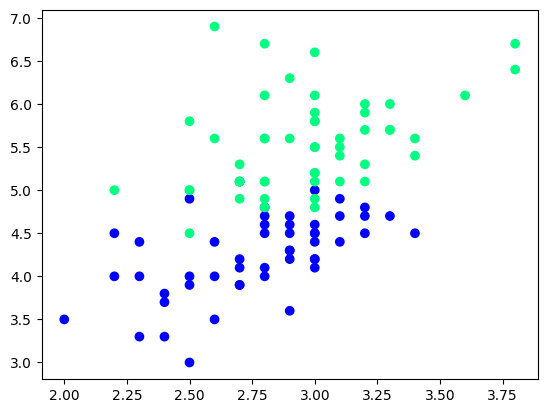

In [22]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [23]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
80,2.4,3.8,1
82,2.7,3.9,1
91,3.0,4.6,1
65,3.1,4.4,1
98,2.5,3.0,1
84,3.0,4.5,1
102,3.0,5.9,2
81,2.4,3.7,1
75,3.0,4.4,1
57,2.4,3.3,1


In [24]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [25]:
df_train

,sepal_width,petal_length,species
79,2.6,3.5,1
68,2.2,4.5,1
133,2.8,5.1,2
137,3.1,5.5,2
103,2.9,5.6,2
75,3.0,4.4,1
70,3.2,4.8,1
57,2.4,3.3,1
135,3.0,6.1,2
56,3.3,4.7,1


In [26]:
df_val

,sepal_width,petal_length,species
128,2.8,5.6,2
78,2.9,4.5,1
52,3.1,4.9,1
89,2.5,4.0,1
120,3.2,5.7,2


In [27]:
df_test

,sepal_width,petal_length,species
71,2.8,4.0,1
122,2.8,6.7,2
113,2.5,5.0,2
64,2.9,3.6,1
95,3.0,4.2,1


In [28]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [29]:
y_test

array([2, 1, 1, 1, 2])

**Case 1 - Bagging**

In [30]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
137,3.1,5.5,2
135,3.0,6.1,2
103,2.9,5.6,2
57,2.4,3.3,1
133,2.8,5.1,2
75,3.0,4.4,1
75,3.0,4.4,1
137,3.1,5.5,2


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [32]:
dt_bag1 = DecisionTreeClassifier()

In [35]:
def evaluate(model, X, y):
    """Evaluates a model's performance."""
    model.fit(X, y)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy:", accuracy)

    # Add any additional evaluation metrics or visualizations as needed

# Now you can call the function
evaluate(dt_bag1, X, y)

Accuracy: 1.0


In [36]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
68,2.2,4.5,1
135,3.0,6.1,2
135,3.0,6.1,2
137,3.1,5.5,2
79,2.6,3.5,1
133,2.8,5.1,2
133,2.8,5.1,2
70,3.2,4.8,1


In [37]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

Accuracy: 1.0


In [38]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
56,3.3,4.7,1
79,2.6,3.5,1
57,2.4,3.3,1
56,3.3,4.7,1
70,3.2,4.8,1
75,3.0,4.4,1
68,2.2,4.5,1
135,3.0,6.1,2


In [39]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

Accuracy: 1.0


In [40]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

**Predict**

In [41]:
df_test

,sepal_width,petal_length,species
71,2.8,4.0,1
122,2.8,6.7,2
113,2.5,5.0,2
64,2.9,3.6,1
95,3.0,4.2,1


In [45]:
print("Predictor 1",dt_bag1.predict(np.array([2.8,4.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.8,6.7]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.0,4.2]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Pasting**

In [46]:
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
79,2.6,3.5,1
68,2.2,4.5,1
133,2.8,5.1,2
137,3.1,5.5,2
103,2.9,5.6,2
75,3.0,4.4,1
70,3.2,4.8,1
57,2.4,3.3,1
135,3.0,6.1,2
56,3.3,4.7,1


In [47]:
df_train.sample(8)

,sepal_width,petal_length,species
137,3.1,5.5,2
79,2.6,3.5,1
57,2.4,3.3,1
56,3.3,4.7,1
70,3.2,4.8,1
103,2.9,5.6,2
68,2.2,4.5,1
133,2.8,5.1,2


**Random Subspaces**

In [48]:
df1 = pd.read_csv('//content/IRIS.csv')
df1 = df1.sample(10)

In [49]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
74,6.4,2.9,4.3,1.3,Iris-versicolor
21,5.1,3.7,1.5,0.4,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
79,5.7,2.6,3.5,1.0,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor
136,6.3,3.4,5.6,2.4,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


In [50]:
df1.sample(2,replace=True,axis=1)

,petal_width,petal_width
34,0.1,0.1
74,1.3,1.3
21,0.4,0.4
46,0.2,0.2
2,0.2,0.2
79,1.0,1.0
59,1.4,1.4
136,2.4,2.4
7,0.2,0.2
37,0.1,0.1


**Random Patches**

In [51]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
74,6.4,2.9,4.3,1.3,Iris-versicolor
21,5.1,3.7,1.5,0.4,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
79,5.7,2.6,3.5,1.0,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor
136,6.3,3.4,5.6,2.4,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


In [52]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal_length,petal_length
74,6.4,4.3
34,4.9,1.5
34,4.9,1.5
34,4.9,1.5
59,5.2,3.9
46,5.1,1.6
37,4.9,1.5
2,4.7,1.3
